## 2 Año de secundaria

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Nota: Considerar que los datos deben tener formato UTF-8, es decir los caracteres propios del idioma español deberían ser transdormados a símbolos

Los datos se perciben del archivo denominado "data_4secundaria.csv", pandas trabaja muy bien con esos datos. Posteriormente se procede a extraer los 5 primeros datos, esto para asegurarnos que no hayan problemas de formato de letra y que pandas con la librería read_csv, correctamente importen los datos. Esto es posible con el método head(), este permitirá traer los 5 primeros registros

In [4]:
dataframe = pd.read_csv(r"data_2secundaria.csv",sep=';')
dataframe.head()

,id,seccion,edad,pf_ac1,pf_ac2,pf_ac3,pf_alg_2019,pf_alg_2020,alg_1b_2021,alg_2b_2021,...,condicion_pago,pe1,pe2,pe3,pe4,pe5,horas_asincronas,valoracion_clases,dispos_clases,calidad_internet
0,265,A,15,14,14,16,14,14,12,14,...,deuda,Facil,Facil,Facil,Facil,Bueno,3 horas,Satisfecho,4,Buena
1,266,A,16,11,13,18,11,12,12,12,...,deuda,Facil,Ni Facil ni Dificil,Ni Facil ni Dificil,Facil,Bueno,3 horas,Satisfecho,3,Buena
2,267,A,15,15,16,17,14,13,12,14,...,deuda,Facil,Facil,Facil,Facil,Bueno,2 horas,Satisfecho,1,Buena
3,268,A,16,10,8,16,11,11,11,12,...,deuda,Ni Facil ni Dificil,Ni Facil ni Dificil,Ni Facil ni Dificil,Ni Facil ni Dificil,Indiferente,2 horas,Indiferente,1,Media
4,269,A,15,17,14,17,13,12,12,12,...,deuda,Facil,Facil,Facil,Facil,Bueno,3 horas,Satisfecho,1,Buena


Podríamos realizar la llamada a n registros con la misma función pero cambiando el parámetro

In [5]:
dataframe.head(10)

,id,seccion,edad,pf_ac1,pf_ac2,pf_ac3,pf_alg_2019,pf_alg_2020,alg_1b_2021,alg_2b_2021,...,condicion_pago,pe1,pe2,pe3,pe4,pe5,horas_asincronas,valoracion_clases,dispos_clases,calidad_internet
0,265,A,15,14,14,16,14,14,12,14,...,deuda,Facil,Facil,Facil,Facil,Bueno,3 horas,Satisfecho,4,Buena
1,266,A,16,11,13,18,11,12,12,12,...,deuda,Facil,Ni Facil ni Dificil,Ni Facil ni Dificil,Facil,Bueno,3 horas,Satisfecho,3,Buena
2,267,A,15,15,16,17,14,13,12,14,...,deuda,Facil,Facil,Facil,Facil,Bueno,2 horas,Satisfecho,1,Buena
3,268,A,16,10,8,16,11,11,11,12,...,deuda,Ni Facil ni Dificil,Ni Facil ni Dificil,Ni Facil ni Dificil,Ni Facil ni Dificil,Indiferente,2 horas,Indiferente,1,Media
4,269,A,15,17,14,17,13,12,12,12,...,deuda,Facil,Facil,Facil,Facil,Bueno,3 horas,Satisfecho,1,Buena
5,270,A,15,17,17,20,16,16,16,16,...,deuda,Facil,Muy Facil,Muy Facil,Facil,Excelente,De 4 horas a más,Muy satisfecho,1,Muy buena
6,271,A,16,13,14,19,13,12,12,12,...,deuda,Ni Facil ni Dificil,Facil,Facil,Ni Facil ni Dificil,Bueno,3 horas,Satisfecho,4,Buena
7,272,A,15,18,19,20,17,17,16,16,...,deuda,Muy Facil,Muy Facil,Muy Facil,Muy Facil,Excelente,De 4 horas a más,Muy satisfecho,2,Muy buena
8,273,A,15,12,14,18,12,12,12,12,...,deuda,Facil,Facil,Ni Facil ni Dificil,Facil,Bueno,3 horas,Satisfecho,1,Buena
9,274,A,16,11,10,16,11,11,11,11,...,deuda,Ni Facil ni Dificil,Facil,Ni Facil ni Dificil,Ni Facil ni Dificil,Indiferente,2 horas,Indiferente,4,Media


Visualizamos estadísticamente a los datos con el método describe()

In [6]:
dataframe.describe()

,id,edad,pf_ac1,pf_ac2,pf_ac3,pf_alg_2019,pf_alg_2020,alg_1b_2021,alg_2b_2021,alg_3b_2021,...,pf_geo_2019,pf_geo_2020,geo_1b_2021,geo_2b_2021,geo_3b_2021,geo_4b_2021,ind_nivel_geo,grupo_mate,anios_colegio,dispos_clases
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,...,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,376.000000,15.529148,14.031390,14.753363,17.139013,13.686099,13.470852,13.246637,13.434978,13.004484,...,13.421525,13.506726,13.062780,12.336323,13.215247,14.125561,2.363229,0.098655,4.044843,2.632287
std,64.518731,0.500273,2.593113,2.755367,1.929723,2.442148,2.523369,2.605810,2.572207,3.337607,...,2.270429,2.340151,2.608994,2.823466,2.665823,3.269077,0.509276,0.298869,0.207425,1.173751
min,265.000000,15.000000,6.000000,6.000000,12.000000,11.000000,6.000000,8.000000,5.000000,5.000000,...,9.000000,11.000000,6.000000,5.000000,5.000000,5.000000,1.000000,0.000000,4.000000,1.000000
25%,320.500000,15.000000,12.000000,13.000000,16.000000,12.000000,11.000000,12.000000,12.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,12.000000,2.000000,0.000000,4.000000,2.000000
50%,376.000000,16.000000,14.000000,15.000000,17.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,13.000000,13.000000,12.000000,13.000000,14.000000,2.000000,0.000000,4.000000,3.000000
75%,431.500000,16.000000,16.000000,17.000000,19.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,14.000000,15.000000,16.000000,3.000000,0.000000,4.000000,4.000000
max,487.000000,16.000000,20.000000,19.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,19.000000,20.000000,20.000000,20.000000,3.000000,1.000000,5.000000,5.000000


Este resultado nos da muchos indicadores, entre los cuales destacan el aseguramiento de tener la cantidad correcta de cada campo del dataframe, así como los valores de media, desviación estándar y los mínimos y máximos.

Sin embargo el detalle más resaltantes es que no se han considerado todas las columnas en las que se ven letras, por tanto se necesita mapear los avlores literales a números, tal es el caso del campo: "condicion_pago". En primer lugar se hará la conversión de los datos de dicha columna y se procederá a hacer lo mismo con el resto de valores no numéricos

In [7]:
dataframe["condicion_pago"]

0      deuda
1      deuda
2      deuda
3      deuda
4      deuda
       ...  
218     beca
219     beca
220     beca
221     beca
222     beca
Name: condicion_pago, Length: 223, dtype: object

Entonces convertimos datos categóricos, ordinales  a numéricos

In [8]:
values_condicion_pago = dataframe["condicion_pago"].astype("category").cat.codes
dataframe["condicion_pago"] = values_condicion_pago

Los nuevos valores son ya numéricos

In [9]:
dataframe["condicion_pago"]

0      1
1      1
2      1
3      1
4      1
      ..
218    0
219    0
220    0
221    0
222    0
Name: condicion_pago, Length: 223, dtype: int8

In [10]:
dataframe.head(10)

,id,seccion,edad,pf_ac1,pf_ac2,pf_ac3,pf_alg_2019,pf_alg_2020,alg_1b_2021,alg_2b_2021,...,condicion_pago,pe1,pe2,pe3,pe4,pe5,horas_asincronas,valoracion_clases,dispos_clases,calidad_internet
0,265,A,15,14,14,16,14,14,12,14,...,1,Facil,Facil,Facil,Facil,Bueno,3 horas,Satisfecho,4,Buena
1,266,A,16,11,13,18,11,12,12,12,...,1,Facil,Ni Facil ni Dificil,Ni Facil ni Dificil,Facil,Bueno,3 horas,Satisfecho,3,Buena
2,267,A,15,15,16,17,14,13,12,14,...,1,Facil,Facil,Facil,Facil,Bueno,2 horas,Satisfecho,1,Buena
3,268,A,16,10,8,16,11,11,11,12,...,1,Ni Facil ni Dificil,Ni Facil ni Dificil,Ni Facil ni Dificil,Ni Facil ni Dificil,Indiferente,2 horas,Indiferente,1,Media
4,269,A,15,17,14,17,13,12,12,12,...,1,Facil,Facil,Facil,Facil,Bueno,3 horas,Satisfecho,1,Buena
5,270,A,15,17,17,20,16,16,16,16,...,1,Facil,Muy Facil,Muy Facil,Facil,Excelente,De 4 horas a más,Muy satisfecho,1,Muy buena
6,271,A,16,13,14,19,13,12,12,12,...,1,Ni Facil ni Dificil,Facil,Facil,Ni Facil ni Dificil,Bueno,3 horas,Satisfecho,4,Buena
7,272,A,15,18,19,20,17,17,16,16,...,1,Muy Facil,Muy Facil,Muy Facil,Muy Facil,Excelente,De 4 horas a más,Muy satisfecho,2,Muy buena
8,273,A,15,12,14,18,12,12,12,12,...,1,Facil,Facil,Ni Facil ni Dificil,Facil,Bueno,3 horas,Satisfecho,1,Buena
9,274,A,16,11,10,16,11,11,11,11,...,1,Ni Facil ni Dificil,Facil,Ni Facil ni Dificil,Ni Facil ni Dificil,Indiferente,2 horas,Indiferente,4,Media


In [11]:
values_pe1 = dataframe["pe1"].astype("category").cat.codes
dataframe["pe1"] = values_pe1

dataframe.head(10)

,id,seccion,edad,pf_ac1,pf_ac2,pf_ac3,pf_alg_2019,pf_alg_2020,alg_1b_2021,alg_2b_2021,...,condicion_pago,pe1,pe2,pe3,pe4,pe5,horas_asincronas,valoracion_clases,dispos_clases,calidad_internet
0,265,A,15,14,14,16,14,14,12,14,...,1,0,Facil,Facil,Facil,Bueno,3 horas,Satisfecho,4,Buena
1,266,A,16,11,13,18,11,12,12,12,...,1,0,Ni Facil ni Dificil,Ni Facil ni Dificil,Facil,Bueno,3 horas,Satisfecho,3,Buena
2,267,A,15,15,16,17,14,13,12,14,...,1,0,Facil,Facil,Facil,Bueno,2 horas,Satisfecho,1,Buena
3,268,A,16,10,8,16,11,11,11,12,...,1,2,Ni Facil ni Dificil,Ni Facil ni Dificil,Ni Facil ni Dificil,Indiferente,2 horas,Indiferente,1,Media
4,269,A,15,17,14,17,13,12,12,12,...,1,0,Facil,Facil,Facil,Bueno,3 horas,Satisfecho,1,Buena
5,270,A,15,17,17,20,16,16,16,16,...,1,0,Muy Facil,Muy Facil,Facil,Excelente,De 4 horas a más,Muy satisfecho,1,Muy buena
6,271,A,16,13,14,19,13,12,12,12,...,1,2,Facil,Facil,Ni Facil ni Dificil,Bueno,3 horas,Satisfecho,4,Buena
7,272,A,15,18,19,20,17,17,16,16,...,1,1,Muy Facil,Muy Facil,Muy Facil,Excelente,De 4 horas a más,Muy satisfecho,2,Muy buena
8,273,A,15,12,14,18,12,12,12,12,...,1,0,Facil,Ni Facil ni Dificil,Facil,Bueno,3 horas,Satisfecho,1,Buena
9,274,A,16,11,10,16,11,11,11,11,...,1,2,Facil,Ni Facil ni Dificil,Ni Facil ni Dificil,Indiferente,2 horas,Indiferente,4,Media


In [12]:
values_pe2 = dataframe["pe2"].astype("category").cat.codes
dataframe["pe2"] = values_pe2

values_pe3 = dataframe["pe3"].astype("category").cat.codes
dataframe["pe3"] = values_pe3

values_pe4 = dataframe["pe4"].astype("category").cat.codes
dataframe["pe4"] = values_pe4

values_pe5 = dataframe["pe5"].astype("category").cat.codes
dataframe["pe5"] = values_pe5



dataframe.head(10)

,id,seccion,edad,pf_ac1,pf_ac2,pf_ac3,pf_alg_2019,pf_alg_2020,alg_1b_2021,alg_2b_2021,...,condicion_pago,pe1,pe2,pe3,pe4,pe5,horas_asincronas,valoracion_clases,dispos_clases,calidad_internet
0,265,A,15,14,14,16,14,14,12,14,...,1,0,0,0,0,0,3 horas,Satisfecho,4,Buena
1,266,A,16,11,13,18,11,12,12,12,...,1,0,2,2,0,0,3 horas,Satisfecho,3,Buena
2,267,A,15,15,16,17,14,13,12,14,...,1,0,0,0,0,0,2 horas,Satisfecho,1,Buena
3,268,A,16,10,8,16,11,11,11,12,...,1,2,2,2,2,2,2 horas,Indiferente,1,Media
4,269,A,15,17,14,17,13,12,12,12,...,1,0,0,0,0,0,3 horas,Satisfecho,1,Buena
5,270,A,15,17,17,20,16,16,16,16,...,1,0,1,1,0,1,De 4 horas a más,Muy satisfecho,1,Muy buena
6,271,A,16,13,14,19,13,12,12,12,...,1,2,0,0,2,0,3 horas,Satisfecho,4,Buena
7,272,A,15,18,19,20,17,17,16,16,...,1,1,1,1,1,1,De 4 horas a más,Muy satisfecho,2,Muy buena
8,273,A,15,12,14,18,12,12,12,12,...,1,0,0,2,0,0,3 horas,Satisfecho,1,Buena
9,274,A,16,11,10,16,11,11,11,11,...,1,2,0,2,2,2,2 horas,Indiferente,4,Media


In [13]:
values_seccion = dataframe["seccion"].astype("category").cat.codes
dataframe["seccion"] = values_seccion

dataframe.head(10)

,id,seccion,edad,pf_ac1,pf_ac2,pf_ac3,pf_alg_2019,pf_alg_2020,alg_1b_2021,alg_2b_2021,...,condicion_pago,pe1,pe2,pe3,pe4,pe5,horas_asincronas,valoracion_clases,dispos_clases,calidad_internet
0,265,0,15,14,14,16,14,14,12,14,...,1,0,0,0,0,0,3 horas,Satisfecho,4,Buena
1,266,0,16,11,13,18,11,12,12,12,...,1,0,2,2,0,0,3 horas,Satisfecho,3,Buena
2,267,0,15,15,16,17,14,13,12,14,...,1,0,0,0,0,0,2 horas,Satisfecho,1,Buena
3,268,0,16,10,8,16,11,11,11,12,...,1,2,2,2,2,2,2 horas,Indiferente,1,Media
4,269,0,15,17,14,17,13,12,12,12,...,1,0,0,0,0,0,3 horas,Satisfecho,1,Buena
5,270,0,15,17,17,20,16,16,16,16,...,1,0,1,1,0,1,De 4 horas a más,Muy satisfecho,1,Muy buena
6,271,0,16,13,14,19,13,12,12,12,...,1,2,0,0,2,0,3 horas,Satisfecho,4,Buena
7,272,0,15,18,19,20,17,17,16,16,...,1,1,1,1,1,1,De 4 horas a más,Muy satisfecho,2,Muy buena
8,273,0,15,12,14,18,12,12,12,12,...,1,0,0,2,0,0,3 horas,Satisfecho,1,Buena
9,274,0,16,11,10,16,11,11,11,11,...,1,2,0,2,2,2,2 horas,Indiferente,4,Media


In [14]:
values_horas_asincronas = dataframe["horas_asincronas"].astype("category").cat.codes
dataframe["horas_asincronas"] = values_horas_asincronas

values_valoracion_clases = dataframe["valoracion_clases"].astype("category").cat.codes
dataframe["valoracion_clases"] = values_valoracion_clases

values_calidad_internet = dataframe["calidad_internet"].astype("category").cat.codes
dataframe["calidad_internet"] = values_calidad_internet

dataframe.head(10)

,id,seccion,edad,pf_ac1,pf_ac2,pf_ac3,pf_alg_2019,pf_alg_2020,alg_1b_2021,alg_2b_2021,...,condicion_pago,pe1,pe2,pe3,pe4,pe5,horas_asincronas,valoracion_clases,dispos_clases,calidad_internet
0,265,0,15,14,14,16,14,14,12,14,...,1,0,0,0,0,0,2,3,4,0
1,266,0,16,11,13,18,11,12,12,12,...,1,0,2,2,0,0,2,3,3,0
2,267,0,15,15,16,17,14,13,12,14,...,1,0,0,0,0,0,1,3,1,0
3,268,0,16,10,8,16,11,11,11,12,...,1,2,2,2,2,2,1,0,1,2
4,269,0,15,17,14,17,13,12,12,12,...,1,0,0,0,0,0,2,3,1,0
5,270,0,15,17,17,20,16,16,16,16,...,1,0,1,1,0,1,3,2,1,3
6,271,0,16,13,14,19,13,12,12,12,...,1,2,0,0,2,0,2,3,4,0
7,272,0,15,18,19,20,17,17,16,16,...,1,1,1,1,1,1,3,2,2,3
8,273,0,15,12,14,18,12,12,12,12,...,1,0,0,2,0,0,2,3,1,0
9,274,0,16,11,10,16,11,11,11,11,...,1,2,0,2,2,2,1,0,4,2


In [15]:
values_genero = dataframe["genero"].astype("category").cat.codes
dataframe["genero"] = values_genero

dataframe.head(10)

,id,seccion,edad,pf_ac1,pf_ac2,pf_ac3,pf_alg_2019,pf_alg_2020,alg_1b_2021,alg_2b_2021,...,condicion_pago,pe1,pe2,pe3,pe4,pe5,horas_asincronas,valoracion_clases,dispos_clases,calidad_internet
0,265,0,15,14,14,16,14,14,12,14,...,1,0,0,0,0,0,2,3,4,0
1,266,0,16,11,13,18,11,12,12,12,...,1,0,2,2,0,0,2,3,3,0
2,267,0,15,15,16,17,14,13,12,14,...,1,0,0,0,0,0,1,3,1,0
3,268,0,16,10,8,16,11,11,11,12,...,1,2,2,2,2,2,1,0,1,2
4,269,0,15,17,14,17,13,12,12,12,...,1,0,0,0,0,0,2,3,1,0
5,270,0,15,17,17,20,16,16,16,16,...,1,0,1,1,0,1,3,2,1,3
6,271,0,16,13,14,19,13,12,12,12,...,1,2,0,0,2,0,2,3,4,0
7,272,0,15,18,19,20,17,17,16,16,...,1,1,1,1,1,1,3,2,2,3
8,273,0,15,12,14,18,12,12,12,12,...,1,0,0,2,0,0,2,3,1,0
9,274,0,16,11,10,16,11,11,11,11,...,1,2,0,2,2,2,1,0,4,2


Vamos a darle un poco de visualización

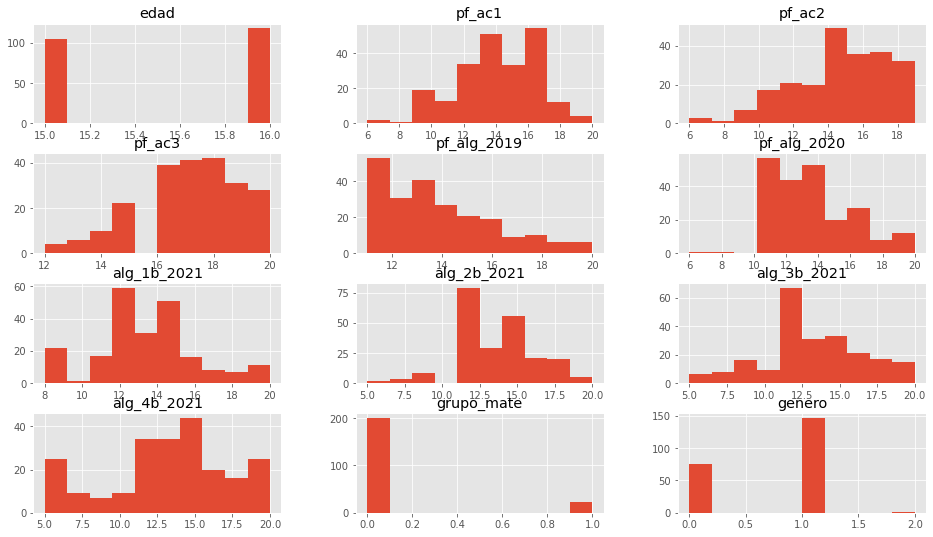

In [16]:
dataframe.hist(['edad','pf_ac1','pf_ac2','pf_ac3','pf_alg_2019','pf_alg_2020','alg_1b_2021','alg_2b_2021',
               'alg_3b_2021','alg_4b_2021','grupo_mate','genero'])
plt.show()

In [17]:
dataframe['ind_nivel_algebra']

0      2
1      2
2      2
3      2
4      2
      ..
218    3
219    3
220    3
221    3
222    3
Name: ind_nivel_algebra, Length: 223, dtype: int64

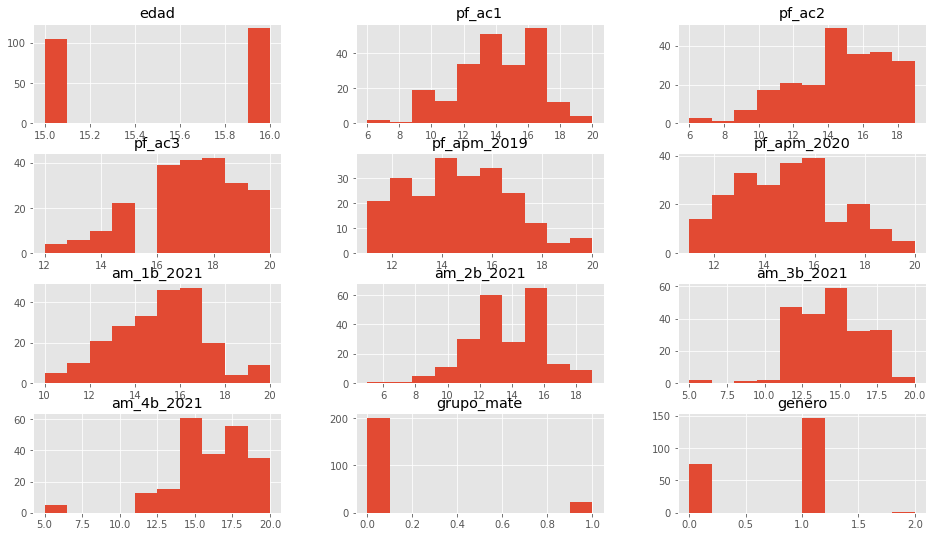

In [18]:
dataframe.hist(['edad','pf_ac1','pf_ac2','pf_ac3','pf_apm_2019','pf_apm_2020','am_1b_2021','am_2b_2021',
               'am_3b_2021','am_4b_2021','grupo_mate','genero'])

plt.show()

In [19]:
dataframe['ind_nivel_am']

0      3
1      2
2      3
3      2
4      3
      ..
218    3
219    3
220    3
221    3
222    3
Name: ind_nivel_am, Length: 223, dtype: int64

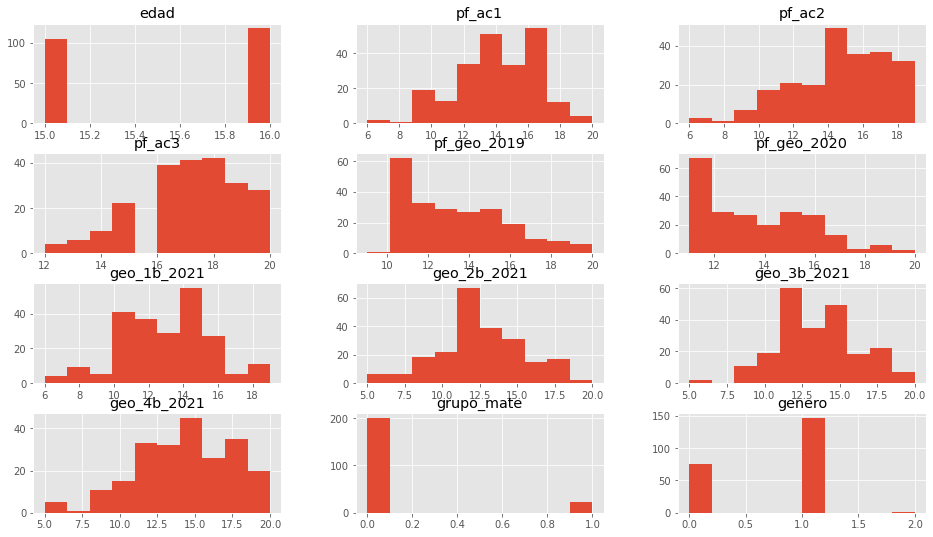

In [20]:
dataframe.hist(['edad','pf_ac1','pf_ac2','pf_ac3','pf_geo_2019','pf_geo_2020','geo_1b_2021','geo_2b_2021',
               'geo_3b_2021','geo_4b_2021','grupo_mate','genero'])
y = dataframe['ind_nivel_geo'].values
plt.show()

In [21]:
dataframe['ind_nivel_geo']

0      2
1      2
2      3
3      2
4      3
      ..
218    3
219    3
220    3
221    3
222    3
Name: ind_nivel_geo, Length: 223, dtype: int64

## Preparación de las entradas

<p style="color:red;font-size:2rem"> <b>Para el caso de Álgebra </b></p>

In [22]:
X = dataframe[['id','seccion','edad','pf_ac1','pf_ac2','pf_ac3','pf_alg_2019','pf_alg_2020','alg_1b_2021','alg_2b_2021',
               'alg_3b_2021','alg_4b_2021','grupo_mate','genero',
               'anios_colegio','condicion_pago','pe3','pe5','horas_asincronas','valoracion_clases',
               'dispos_clases','calidad_internet']].values
y = dataframe['ind_nivel_algebra'].values
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
n_neighbors = 1
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.93


#### Precisión del modelo

In [24]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 1  1  0]
 [ 0 35  0]
 [ 0  3 16]]
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.90      1.00      0.95        35
           3       1.00      0.84      0.91        19

    accuracy                           0.93        56
   macro avg       0.97      0.78      0.84        56
weighted avg       0.94      0.93      0.93        56



In [25]:
correlation_matrix = dataframe[['id','seccion','edad','pf_ac1','pf_ac2','pf_ac3','pf_alg_2019','pf_alg_2020','alg_1b_2021','alg_2b_2021',
               'alg_3b_2021','alg_4b_2021','grupo_mate','genero',
               'anios_colegio','condicion_pago','pe3','pe5','horas_asincronas','valoracion_clases',
               'dispos_clases','calidad_internet','ind_nivel_algebra']].corr()
correlation_matrix["ind_nivel_algebra"]

id                   0.300456
seccion              0.321369
edad                 0.038850
pf_ac1               0.706827
pf_ac2               0.695820
pf_ac3               0.606518
pf_alg_2019          0.798181
pf_alg_2020          0.813768
alg_1b_2021          0.760881
alg_2b_2021          0.832141
alg_3b_2021          0.816646
alg_4b_2021          0.776591
grupo_mate           0.405677
genero              -0.115324
anios_colegio       -0.089804
condicion_pago      -0.405677
pe3                 -0.394919
pe5                 -0.271102
horas_asincronas     0.574514
valoracion_clases    0.362435
dispos_clases        0.012865
calidad_internet     0.079893
ind_nivel_algebra    1.000000
Name: ind_nivel_algebra, dtype: float64

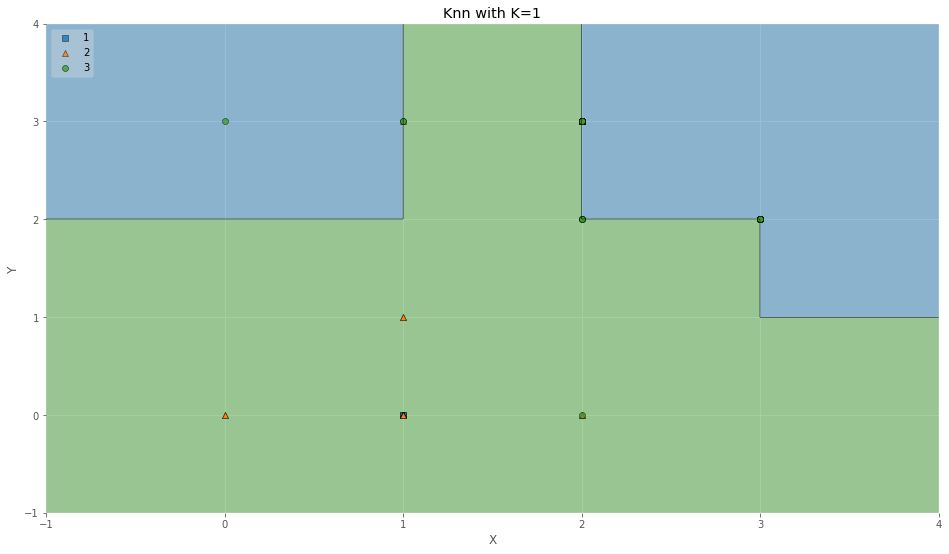

In [26]:
def knn_comparison(data, k):
    x = data[['horas_asincronas','valoracion_clases']].values
    y = data['ind_nivel_am'].values

    clf = neighbors.KNeighborsClassifier(n_neighbors=k)

    clf.fit(x, y)
    # Plotting decision region
    plot_decision_regions(x, y, clf=clf, legend=2)
    # Adding axes annotations
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Knn with K=1')
    plt.show()
    

knn_comparison(dataframe, 1)

<p style="color:red;font-size:2rem"> <b>Para el caso de Aptitud matemática </b></p>

In [27]:
X = dataframe[['id','seccion','edad','pf_ac1','pf_ac2','pf_ac3','pf_apm_2019','pf_apm_2020','am_1b_2021','am_2b_2021',
               'am_3b_2021','am_4b_2021','grupo_mate','genero',
               'anios_colegio','condicion_pago','pe2','pe4','pe5','horas_asincronas','valoracion_clases',
               'dispos_clases','calidad_internet']].values
y = dataframe['ind_nivel_am'].values
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
n_neighbors = 7
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.95


In [29]:
df = dataframe[['id','seccion','edad','pf_ac1','pf_ac2','pf_ac3','pf_apm_2019','pf_apm_2020','am_1b_2021','am_2b_2021',
               'am_3b_2021','am_4b_2021','grupo_mate','genero',
               'anios_colegio','condicion_pago','pe2','pe4','pe5','horas_asincronas','valoracion_clases',
               'dispos_clases','calidad_internet']]

df

,id,seccion,edad,pf_ac1,pf_ac2,pf_ac3,pf_apm_2019,pf_apm_2020,am_1b_2021,am_2b_2021,...,genero,anios_colegio,condicion_pago,pe2,pe4,pe5,horas_asincronas,valoracion_clases,dispos_clases,calidad_internet
0,265,0,15,14,14,16,13,15,14,14,...,1,4,1,0,0,0,2,3,4,0
1,266,0,16,11,13,18,11,11,13,11,...,1,4,1,2,0,0,2,3,3,0
2,267,0,15,15,16,17,16,16,14,15,...,1,4,1,0,0,0,1,3,1,0
3,268,0,16,10,8,16,11,14,10,11,...,0,4,1,2,2,2,1,0,1,2
4,269,0,15,17,14,17,14,15,15,14,...,1,4,1,0,0,0,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,483,6,16,17,19,20,16,20,16,16,...,1,4,0,1,0,1,3,2,1,0
219,484,6,16,15,18,20,15,16,16,16,...,1,4,0,0,1,1,2,2,2,3
220,485,6,15,18,19,20,17,19,17,16,...,1,4,0,1,1,1,3,2,1,3
221,486,7,15,17,18,20,16,15,15,15,...,1,4,0,0,0,1,3,2,3,0


#### Precisión del modelo

In [30]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[20  3]
 [ 0 33]]
              precision    recall  f1-score   support

           2       1.00      0.87      0.93        23
           3       0.92      1.00      0.96        33

    accuracy                           0.95        56
   macro avg       0.96      0.93      0.94        56
weighted avg       0.95      0.95      0.95        56



In [31]:
correlation_matrix = dataframe[['id','seccion','edad','pf_ac1','pf_ac2','pf_ac3','pf_apm_2019','pf_apm_2020','am_1b_2021','am_2b_2021',
               'am_3b_2021','am_4b_2021','grupo_mate','genero',
               'anios_colegio','condicion_pago','pe2','pe4','pe5','horas_asincronas','valoracion_clases',
               'dispos_clases','calidad_internet','ind_nivel_am']].corr()
correlation_matrix["ind_nivel_am"]

id                   0.342357
seccion              0.356556
edad                -0.088166
pf_ac1               0.756321
pf_ac2               0.743423
pf_ac3               0.552957
pf_apm_2019          0.696653
pf_apm_2020          0.696470
am_1b_2021           0.658050
am_2b_2021           0.764317
am_3b_2021           0.651344
am_4b_2021           0.671662
grupo_mate           0.255165
genero              -0.089887
anios_colegio       -0.132732
condicion_pago      -0.255165
pe2                 -0.164108
pe4                 -0.438995
pe5                 -0.515856
horas_asincronas     0.595086
valoracion_clases    0.579625
dispos_clases       -0.022642
calidad_internet    -0.172874
ind_nivel_am         1.000000
Name: ind_nivel_am, dtype: float64

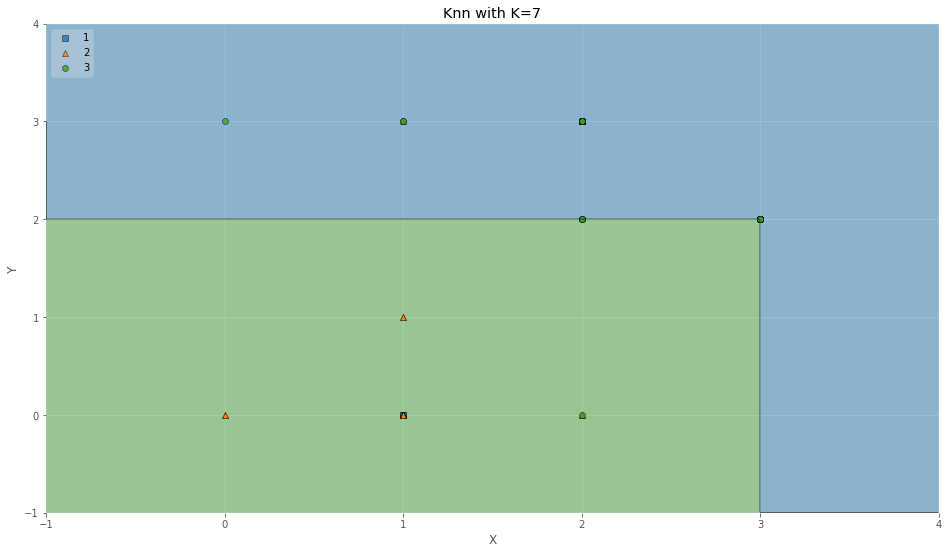

In [32]:
def knn_comparison(data, k):
    x = data[['horas_asincronas','valoracion_clases']].values
    y = data['ind_nivel_am'].values

    clf = neighbors.KNeighborsClassifier(n_neighbors=k)

    clf.fit(x, y)
    # Plotting decision region
    plot_decision_regions(x, y, clf=clf, legend=2)
    # Adding axes annotations
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Knn with K=7')
    plt.show()
    

knn_comparison(dataframe, 7)

<p style="color:red;font-size:2rem"> <b>Para el caso de Geometría</b></p>

In [33]:
X = dataframe[['id','seccion','edad','pf_ac1','pf_ac2','pf_ac3','pf_geo_2019','pf_geo_2020','geo_1b_2021','geo_2b_2021',
               'geo_3b_2021','geo_4b_2021','grupo_mate','genero',
               'anios_colegio','condicion_pago','pe1','pe5','horas_asincronas','valoracion_clases',
               'dispos_clases','calidad_internet']].values
y = dataframe['ind_nivel_geo'].values
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.93


In [35]:
df = dataframe[['id','seccion','edad','pf_ac1','pf_ac2','pf_ac3','pf_geo_2019','pf_geo_2020','geo_1b_2021','geo_2b_2021',
               'geo_3b_2021','geo_4b_2021','grupo_mate','genero',
               'anios_colegio','condicion_pago','pe1','pe5','horas_asincronas','valoracion_clases',
               'dispos_clases','calidad_internet']]

df

,id,seccion,edad,pf_ac1,pf_ac2,pf_ac3,pf_geo_2019,pf_geo_2020,geo_1b_2021,geo_2b_2021,...,grupo_mate,genero,anios_colegio,condicion_pago,pe1,pe5,horas_asincronas,valoracion_clases,dispos_clases,calidad_internet
0,265,0,15,14,14,16,13,13,14,13,...,0,1,4,1,0,0,2,3,4,0
1,266,0,16,11,13,18,15,15,15,13,...,0,1,4,1,0,0,2,3,3,0
2,267,0,15,15,16,17,14,14,14,13,...,0,1,4,1,0,0,1,3,1,0
3,268,0,16,10,8,16,11,11,10,8,...,0,0,4,1,2,2,1,0,1,2
4,269,0,15,17,14,17,15,16,16,12,...,0,1,4,1,0,0,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,483,6,16,17,19,20,14,16,14,16,...,1,1,4,0,0,1,3,2,1,0
219,484,6,16,15,18,20,18,15,14,16,...,1,1,4,0,1,1,2,2,2,3
220,485,6,15,18,19,20,17,20,17,17,...,1,1,4,0,1,1,3,2,1,3
221,486,7,15,17,18,20,15,15,14,18,...,1,1,4,0,0,1,3,2,3,0


#### Precisión del modelo

In [36]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 0  2  0]
 [ 0 34  1]
 [ 0  1 18]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.92      0.97      0.94        35
           3       0.95      0.95      0.95        19

    accuracy                           0.93        56
   macro avg       0.62      0.64      0.63        56
weighted avg       0.90      0.93      0.91        56



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
correlation_matrix = dataframe[['id','seccion','edad','pf_ac1','pf_ac2','pf_ac3','pf_geo_2019','pf_geo_2020','geo_1b_2021','geo_2b_2021',
               'geo_3b_2021','geo_4b_2021','grupo_mate','genero',
               'anios_colegio','condicion_pago','pe1','pe5','horas_asincronas','valoracion_clases',
               'dispos_clases','calidad_internet','ind_nivel_geo']].corr()
correlation_matrix["ind_nivel_geo"]

id                   0.105560
seccion              0.124198
edad                 0.020138
pf_ac1               0.612115
pf_ac2               0.561690
pf_ac3               0.493827
pf_geo_2019          0.743520
pf_geo_2020          0.748198
geo_1b_2021          0.640452
geo_2b_2021          0.732280
geo_3b_2021          0.748400
geo_4b_2021          0.740881
grupo_mate           0.296212
genero              -0.094094
anios_colegio       -0.026962
condicion_pago      -0.296212
pe1                 -0.450385
pe5                 -0.221828
horas_asincronas     0.518198
valoracion_clases    0.313302
dispos_clases       -0.129727
calidad_internet     0.096527
ind_nivel_geo        1.000000
Name: ind_nivel_geo, dtype: float64

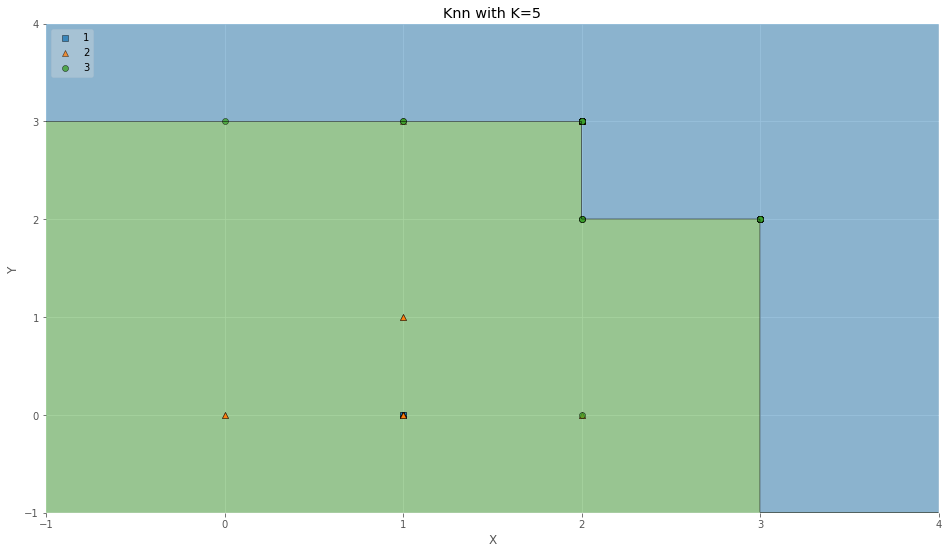

In [38]:
def knn_comparison(data, k):
    x = data[['horas_asincronas','valoracion_clases']].values
    y = data['ind_nivel_am'].values

    clf = neighbors.KNeighborsClassifier(n_neighbors=k)

    clf.fit(x, y)
    # Plotting decision region
    plot_decision_regions(x, y, clf=clf, legend=2)
    # Adding axes annotations
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Knn with K=5')
    plt.show()
    

knn_comparison(dataframe, 5)